# Chapter 1 Arrays and Strings

from Gayle Laakmann McDowell's "Cracking the Coding Interview", 6th ed.

Ron Wu

## 1.1 check if a string has all unique char

In [1]:
def isUnique(words):
    if len(words) < 1:
        print 'The string is not valid!'
        return False
    
    charDic = {}
    words = words.lower()
    for w in words:
        if w != ' ':
            if w in charDic:
                print '\'' + words + '\' is not unique' 
                return False
            charDic[w] = 1
            
    print '\'' + words + '\' is unique'         
    return True


isUnique('apple')    

'apple' is not unique


False

## 1.2 check if one string is a permutation of the other

In [2]:
def isPermuted(words, words2):
    if len(words) < 1 or len(words2) < 1:
        print 'One of the strings is not valid!'
        return False
    
    charDic = {}
    words = words.lower()
    for w in words:
        if w != ' ':
            if w in charDic:
                charDic[w] += 1
            else:
                charDic[w] = 1
        words = words.lower()
    
    words2 = words2.lower()    
    for w in words2:
        if w != ' ':
            if w in charDic:
                charDic[w] -= 1
            else:
                print '\'' + words2 + '\' is not a permutation of \'' + words + '\''    
                return False
        
    print '\'' + words2 + '\' is a permutation of \'' + words + '\''          
    return True

isPermuted('eat', 'tea')    

'tea' is a permutation of 'eat'


True

## 1.3 convert spaces in a string to url %20

In [3]:
def stringReplace(words, takeOut, rep):
    if len(words) < 1 or len(takeOut) != 1:
        print 'Input is not valid!'
        return 
    
    result = []
    for w in words:
        if w != takeOut:
            result.append(w)
        else:
            if result[-1] != rep:
                result.append(rep)
            
    return ''.join(result)

stringReplace('Mr & Mrs  Smith', ' ', '%20')            

'Mr%20&%20Mrs%20Smith'

## 1.4 check if one is a permutation of a palindrome word

In [4]:
def isPalindrome(words):
    if len(words) < 1:
        print 'Input is not valid!'
        return 
    
    charDic = {}
    words = words.lower()
     
    for w in words:
        if w != ' ':
            if w in charDic:
                charDic[w] += 1
            else:
                charDic[w] = 1
    
    tolerance = 1 
    for (k,n) in charDic.items(): 
        if n % 2 == 1:
            if tolerance == 0:
                print '\'' + words + '\' is not a palindrome permutation'    
                return False 
            tolerance -= 1
            
    print '\'' + words + '\' is a palindrome permutation'        
    return True
    
isPalindrome('Tact Coa')    

'tact coa' is a palindrome permutation


True

## 1.5 check if a sting is one edit away from the other

In [5]:
def isOneAway(words, words2):
    if len(words) < 1 or len(words2) < 1:
        print 'One of the strings is not valid!'
        return False
    
    if (len(words) - len(words2)) not in [0,-1,1]:
        print 'they are not one away'
        return False
    
    tolerance = 1 
    if len(words) == len(words2):
        for w, v in zip(words, words2):
            if w != v:
                if tolerance == 0: 
                    print 'they are not one away'
                    return False
                tolerance -= 1 
                
    elif len(words) < len(words2): 
         # one could use split here, but it is not optimal
        i = 0
        for j in range(len(words2)):
            
            if words[i] != words2[j]:
                if tolerance == 0: 
                    print 'they are not one away'
                    return False
                tolerance -= 1 
                i -= 1                
            i += 1    
            
    else:
        j = 0
        for i in range(len(words)):
            
            if words[i] != words2[j]:
                if tolerance == 0: 
                    print 'they are not one away'
                    return False
                tolerance -= 1 
                j -= 1                
            j += 1  
    
    print 'they are one edit away'        
    return True             
    
isOneAway('ple', 'bale')    

they are not one away


False

## 1.6 string compression

In [6]:
def stringCompress(words):
    if len(words) < 1:
        print 'Invalid input'
        return False
    
    if len(words) == 1:
        return words + '1'
    
    words = words.lower()
    preChar = words[0]    
    resultChar = [preChar]
    resultCount = [1]
    
    for w in words[1:]:
        if w == ' ':
            continue
        
        if w == preChar:
            resultCount[-1] += 1
        else:
            preChar = w
            resultChar.append(w)
            resultCount.append(1)
    
    return ''.join([v + str(w) for v,w in zip(resultChar, resultCount)])            

stringCompress('mississippi')

'm1i1s2i1s2i1p2i1'

## 1.7 rotate image $90^o$

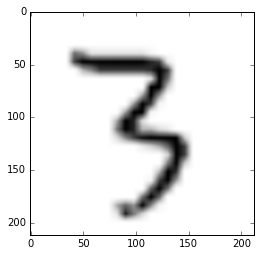

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

fname = 'data/3_handwritten.png'
image = Image.open(fname).convert("L")
imageMatrix = np.asarray(image)
plt.imshow(imageMatrix, cmap='Greys_r')
plt.show()

In [8]:
def rotateImage(pic):
    (u, v) = pic.shape
    
    if u != v:
        print 'invalid input'
        return 
    
    for i in range(u/2):
        for j in range(u/2):
            e = pic[i,j]
            pic[i,j] = pic[u-j-1,i]
            pic[u-j-1,i] = pic[u-i-1,u-j-1]
            pic[u-i-1,u-j-1] = pic[j,u-i-1] 
            pic[j,u-i-1]  = e
        

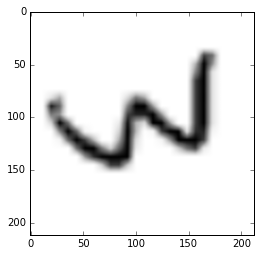

In [9]:
import numpy as np
mat = np.copy(imageMatrix)
rotateImage(mat)
plt.imshow(mat, cmap='Greys_r')
plt.show()

## 1.8 set its row and col to 0 if an entry is 0

In [10]:
def setRowColZero(mat):
    (u,v) = mat.shape 
    if u < 1 or v < 1:
        print 'invalid input'
        return 
    
    deleteCol = set()
    deleteRow = set()
    for i in range(u):
        for j in range(v):
            if mat[i,j] == 0:
                deleteCol.add(j)
                deleteRow.add(i)
                
    for c in deleteCol:
        for i in range(u):
            mat[i,c] = 0
            
    for r in deleteRow:
        for j in range(v):
            mat[r,j] = 0

import numpy as np            
mat = np.matrix([[0,1,2],[3,4,5],[0,6,7]]) 
print 'Input:'
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in mat]))
setRowColZero(mat)     
print '\nOutput:'
print mat

Input:
[[0 1 2]]
[[3 4 5]]
[[0 6 7]]

Output:
[[0 0 0]
 [0 4 5]
 [0 0 0]]


## 1.9 check if string2 is a rotation of string1 by using isSubstring 

In [11]:
def isSubstring (s1, s2):
    return s2 in s1

def isRotation(s1, s2):
    if len(s1) != len(s2):
        print 'they are not rotation'
        return False
    
    for i in range(len(s2)): 
        if isSubstring(s1, s2[i:]+s2[:i]):
            print 'they are rotations'
            return True
        
    print 'they are not rotations'
    return False
    '''
    The solution is more elegant with one call        
    '''    
    if isSubstring(s1+s1, s2):
        print 'they are rotations'
        return True
    else:
        print 'they are not rotation'
        return False

isRotation('waterbottle','bottlewater')

they are rotations


True